# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]#petal length,petal width
y = (iris.target == 0).astype(np.int)#iris setosa

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [9]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress",
             "Coat", "Sandall", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.04008056,  0.02959125, -0.06431875, ...,  0.06243376,
        -0.04704412,  0.07414126],
       [ 0.02015518,  0.0302932 , -0.03449516, ...,  0.00201695,
        -0.05476402, -0.03841583],
       [-0.05091793, -0.01616798,  0.00444295, ..., -0.02233121,
         0.04462135,  0.06587856],
       ...,
       [ 0.05353534, -0.04193216,  0.07330872, ...,  0.02799427,
         0.00228148,  0.01203382],
       [-0.0584253 ,  0.01497208,  0.0402849 , ..., -0.0218798 ,
        -0.05822777, -0.0164887 ],
       [ 0.05155964, -0.06654186, -0.04122565, ...,  0.03166872,
        -0.0193195 , -0.04880189]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 954us/step - loss: 0.7065 - accuracy: 0.7695 - val_loss: 0.4981 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 1s 869us/step - loss: 0.4832 - accuracy: 0.8317 - val_loss: 0.4720 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 2s 958us/step - loss: 0.4396 - accuracy: 0.8450 - val_loss: 0.4139 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 1s 870us/step - loss: 0.4115 - accuracy: 0.8547 - val_loss: 0.4028 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 1s 869us/step - loss: 0.3916 - accuracy: 0.8617 - val_loss: 0.3906 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 2s 912us/step - loss: 0.3753 - accuracy: 0.8673 - val_loss: 0.3795 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 894us/step - loss: 0.3628 - accuracy: 0.8704 - val_loss: 0.3636 -

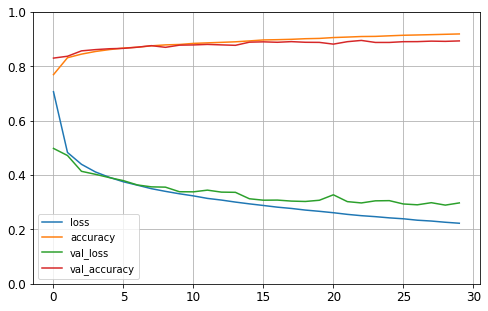

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Sets the veritcal range to [0,-1] 
plt.show()